## IMPORTING RELEVANT LIBRARIES

In [15]:
# importing relevant libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tsfel
from sklearn.preprocessing import StandardScaler

## PROCESSING DATA TO CREATE TEST AND TRAIN SETS

In [3]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


## PROCESSING RAW DATA WITH PCA

In [22]:
# creating an array with values of total acceleration
x_total_acc = np.sum(X_train**2, axis=2)

# mean and sd calculation required for standardization
mean = np.mean(x_total_acc, axis=0)
std = np.std(x_total_acc, axis=0)

# standardizing
X_standardized = (x_total_acc - mean) / std

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# naming all activities
class_names = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs',
               4: 'Sitting', 5: 'Standing', 6: 'Laying'}
dynamic_activities = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs'}
static_activities = {4: 'Sitting', 5: 'Standing', 6: 'Laying'}

# colours for each class in raw data, keeping static and dynamic clearly distinguishable
colours_dyn_stat = ["lightcoral", "indianred", "brown", "lightseagreen", "royalblue", "navy"]

# creating pandas dataframe
x_pca_df = pd.DataFrame(X_pca, columns = ["pca1", "pca2"])
x_pca_df['class'] = y_train

# defining function for scatter plot
def post_pca_scatter_plot(class_dictionary, title, pca_df, colours, edgecolour = None, size = 50):
    plt.figure(figsize=(7, 6))
    for class_value, class_name in class_dictionary.items():  #loop iterating over activities, plotting each
        df = pca_df[pca_df["class"]==class_value]
        plt.scatter(df["pca1"], df["pca2"], color=colours[class_value - 1], label=class_name, edgecolor = edgecolour, s = size)
    # labelling the graph
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.legend()  # Show the legend with class names
    plt.show()

## SCATTER PLOTS AFTER PROCSSING RAW DATA USING PCA

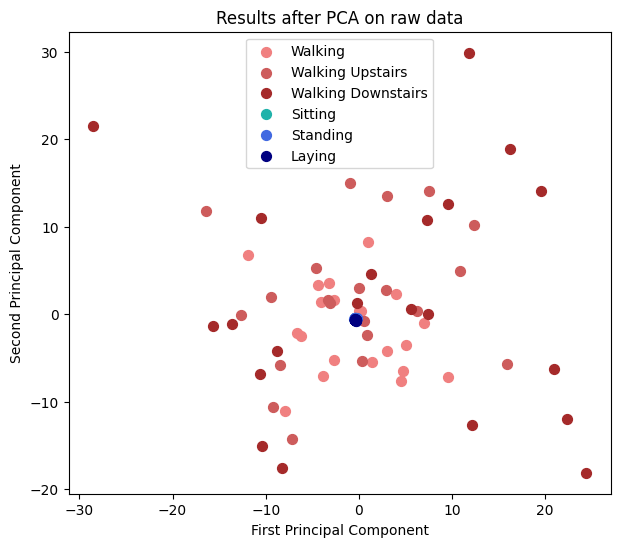

In [26]:
post_pca_scatter_plot(class_names, "Results after PCA on raw data", x_pca_df, colours_dyn_stat)

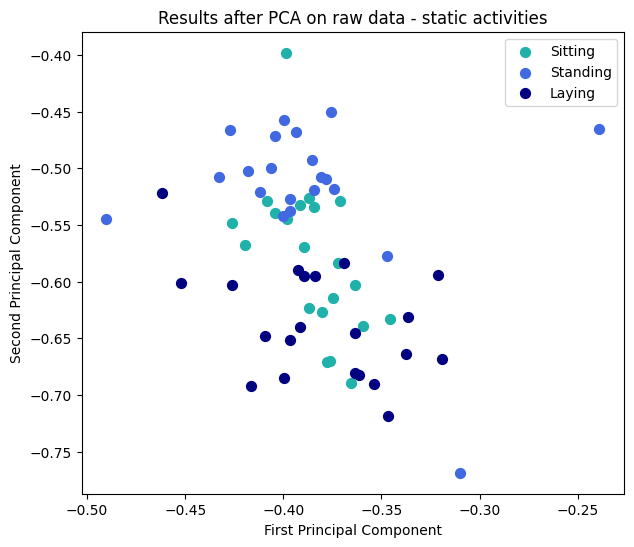

In [27]:
post_pca_scatter_plot(static_activities, "Results after PCA on raw data - static activities", x_pca_df, colours_dyn_stat)

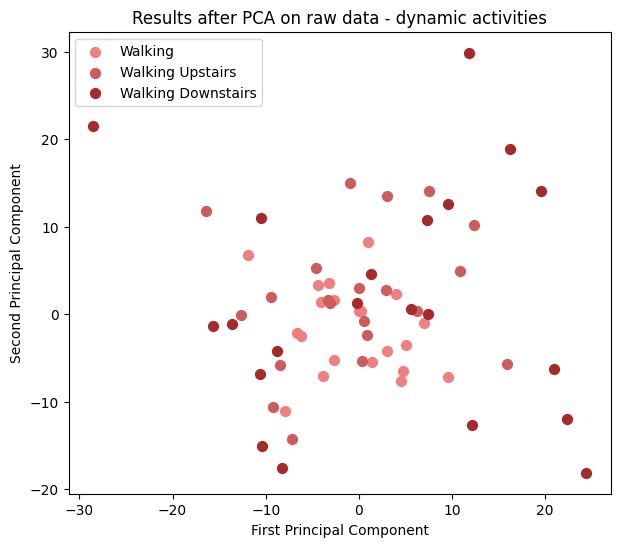

In [28]:
post_pca_scatter_plot(dynamic_activities, "Results after PCA on raw data - dynamic activities", x_pca_df, colours_dyn_stat)

## EXTRACTING FEATURES USING TSFEL

In [30]:
# creating a custom configuration from the existing statistical domain configuration
cgf_file = tsfel.get_features_by_domain()
features = ["Max", "Min","Mean", "Median", "Standard deviation", "Variance", "Kurtosis",
            "Skewness", "Root mean square", "Entropy", ]
for i in cgf_file['statistical'].keys():
    if i not in features:
        cgf_file['statistical'][i]['use'] = 'no'

# creating a dataframe to store info after tsfel feature extraction
data_columns = ["maximum_x", "minimum_x", "mean_x", "median_x", "standard_deviation_x", "variance_x",
                "kurtosis_x", "skewness_x", "root_mean_square_x", "entropy_x", "maximum_y",
                "minimum_y", "mean_y", "median_y", "standard_deviation_y", "variance_y", "kurtosis_y",
                "skewness_y", "root_mean_square_y", "entropy_y", "maximum_z", "minimum_z", "mean_z",
                "median_z", "standard_deviation_z", "variance_z", "kurtosis_z", "skewness_z",
                "root_mean_square_z", "entropy_z", "maximum_total", "minimum_total", "mean_total",
                "median_total", "standard_deviation_total", "variance_total", "kurtosis_total",
                "skewness_total", "root_mean_square_total", "entropy_total"]
x_tsfel = pd.DataFrame(columns = data_columns)

# extracting features for each sample, one column at a time
for x in range(126): # choosing one sample
    x_df = pd.DataFrame(X_train[x], columns = ['acc_x', 'acc_y', 'acc_z']) # creating dataframe for one sample
    x_df['total_acc'] = x_total_acc[x]                                     # each dataframe has 4 columns
    sample_features_row = [] # creating an empty row
    for column in x_df.columns: # traversing through the 4 columns of the dataset
        extracted_features = tsfel.time_series_features_extractor(cgf_file, x_df[column], verbose=0, fs = 50) 
        sample_features_row.extend(extracted_features.iloc[0].values) # extracting the row of values from the
    x_tsfel.loc[x] = sample_features_row # extracted_features dataframe and setting it as a row in x_tsfel


## PROCESSING DATA EXTRACTED USING TSFEL WITH PCA

In [58]:
# standardizing the data
scaler = StandardScaler()
tsfel_scaled = scaler.fit_transform(x_tsfel)

# applying pca
pca = PCA(n_components=2)
tsfel_pca = pca.fit_transform(tsfel_scaled)
tsfel_pca = pd.DataFrame(tsfel_pca, columns=['pca1', 'pca2']) # converting back into a dataframe

# adding class labels to the PCA result
tsfel_pca['class'] = y_train

# creating a list of colours to distinguish all classes
colours_sep_classes = ["steelblue", "mediumseagreen", "indianred", "mediumpurple", "khaki", "cadetblue"]

## SCATTER PLOTS OF TSFEL DATA PROCESSED USING PCA

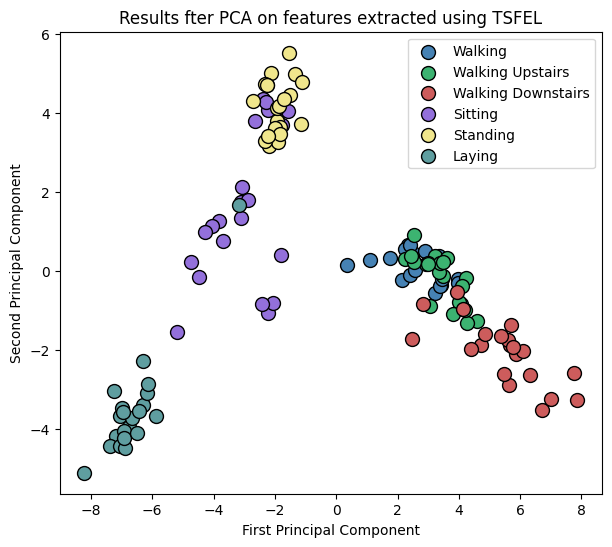

In [59]:
post_pca_scatter_plot(class_names, "Results fter PCA on features extracted using TSFEL", tsfel_pca, colours_sep_classes, 'k', 100)

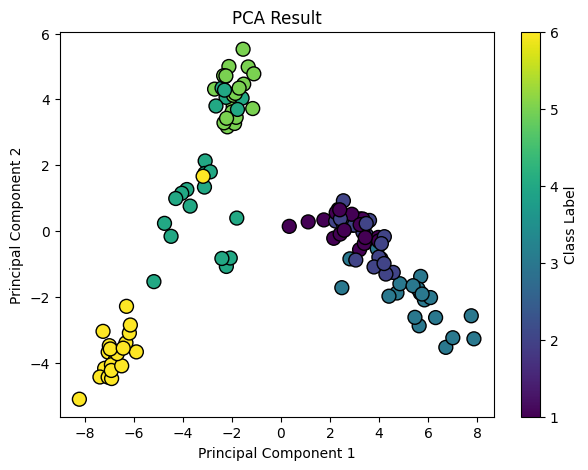

In [20]:
# Scatter plot of PCA results, coloring by class label
plt.figure(figsize=(7,5))
plt.scatter(tsfel_pca['pca1'], tsfel_pca['pca2'], c=y_train, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.colorbar(label='Class Label')
plt.show()

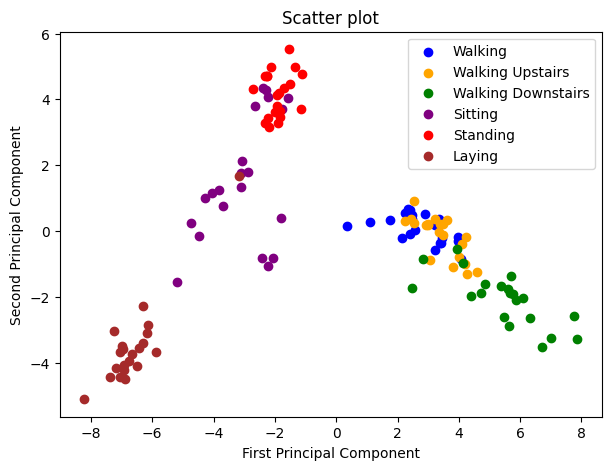

In [21]:
plt.figure(figsize=(7, 5))
colours_sep_classes = [""]
new_colours = ['teal', 'skyblue', 'lightcoral', 'mediumseagreen', 'khaki', 'silver']
clrs = ['blue', 'orange', 'green', 'purple', 'red', 'brown']
for class_value, class_name in class_names.items():  #loop iterating over activities, plotting each
    df = df_pca[df_pca["class_label"]==class_value]
    plt.scatter(df["PC1"], df["PC2"], color=clrs[class_value - 1], label=class_name)

# labelling the graph
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter plot')
plt.legend()  # Show the legend with class names
plt.show()